## Julia Interfacing with R and Python

In [1]:
using PyCall
using RCall
using DecisionTree
using DataFrames
using ScikitLearn
using VegaDatasets
ENV["COLUMNS"]=1000; # for dataframe column size

### R"" vs py"" String Macro

- R"" executes R commands inside the string and returns an R object 
- py"" executes Python commands with implicit conversion of python objects into Julia data type.

In [2]:
py"1+4" # returns julia numeric value by implicit conversion

5

In [3]:
R"result=1+1" # returns an RObject

RObject{RealSxp}
[1] 2


In [4]:
@rget result # use @rget macro to copy value from R to Julia

2.0

In [5]:
R"1+1" |> rcopy # or use rcopy to directoy convert R object into Julia data type 

2.0

### Defining a function in Python

In [6]:
py"""

import numpy as np

def mysin(x):
   return np.sin(x)
"""

In [7]:
py"mysin(10)" # calling python function

-0.5440211108893699

In [8]:
py"np.sin(10)"  # calling directly numpy sin function

-0.5440211108893699

In [9]:
pyimport("numpy").sin(10) # import numpy and call sin directly

-0.5440211108893699

### Defining a function in R

In [10]:
R"""
mysin <- function(x) {
   sin(x)
}
""";

In [11]:
R"mysin(10)" |> rcopy   # R"" returns an object which rcopy converts to Julia data

-0.5440211108893699

## Copying from-to R/Julia

In [12]:
iris = R"iris" |> rcopy # copy iris dataset from R to Julia
iris |> (x->first(x,5))

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [13]:
df = DataFrame(a=rand(5),b=rand(5)) # create dataframe

,a,b
,Float64,Float64
1,0.920695,0.442558
2,0.194406,0.351535
3,0.662752,0.318054
4,0.441073,0.606813
5,0.0119468,0.468722


In [14]:
@rput df # copy df to R

,a,b
,Float64,Float64
1,0.920695,0.442558
2,0.194406,0.351535
3,0.662752,0.318054
4,0.441073,0.606813
5,0.0119468,0.468722


In [15]:
R"df" # check if R got df

RObject{VecSxp}
           a         b
1 0.92069525 0.4425584
2 0.19440597 0.3515354
3 0.66275193 0.3180544
4 0.44107326 0.6068132
5 0.01194681 0.4687218


### Plotting with R and Python

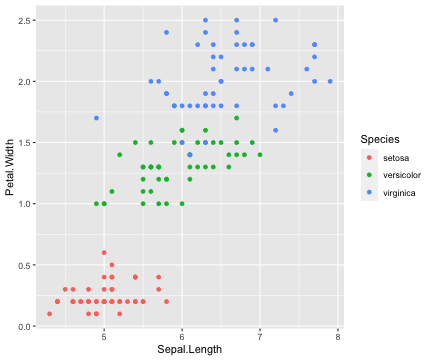

RObject{VecSxp}


In [16]:
R"""
library(ggplot2)

ggplot(iris,aes(x=Sepal.Length,y=Petal.Width))+geom_point(aes(color=Species))
"""

In [17]:
# won't run in binder
py"""
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
"""

###   Scikitlearn classifiers using Julia bindings of Python (PyCall.jl)

Let's load the `car` dataset for this example.

In [18]:
using VegaDatasets
cars=dataset("cars") |> DataFrame;
first(cars,5)

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
,String,Float64?,Int64,Float64,Int64?,Int64,Float64,String,String
1,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,1970-01-01,USA
2,buick skylark 320,15.0,8,350.0,165,3693,11.5,1970-01-01,USA
3,plymouth satellite,18.0,8,318.0,150,3436,11.0,1970-01-01,USA
4,amc rebel sst,16.0,8,304.0,150,3433,12.0,1970-01-01,USA
5,ford torino,17.0,8,302.0,140,3449,10.5,1970-01-01,USA


In [19]:
@rput cars
cars = R"cars = cars[complete.cases(cars),]" |> rcopy;

In [20]:
using PyCall
LNM = pyimport("sklearn.linear_model");
learner=LNM.LogisticRegression()

x=cars[:,[2,4,5,6,7]] |> Matrix
y=cars[:,:Cylinders] |> Array;

model=learner.fit(x, y)
yhat = model.predict(x)
accuracy = sum(yhat .== y) / length(y)
println("accuracy: $accuracy")

accuracy: 0.951530612244898


In [21]:
R"table($yhat,$y)"

RObject{IntSxp}
   
      3   4   5   6   8
  3   4   0   0   0   0
  4   0 196   3   4   0
  5   0   1   0   1   0
  6   0   2   0  75   5
  8   0   0   0   3  98


In [22]:
learner

PyObject LogisticRegression()

In [23]:
using ScikitLearn.CrossValidation: cross_val_score

KNN = pyimport("sklearn.neighbors")

modelKNN = KNN.KNeighborsClassifier(3)

cross_val_score(modelKNN, x, y; cv=10)  # 5-fold

┌ Warning: The least populated class in y has only 3 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
└ @ ScikitLearn.Skcore /Users/fearghalodonncha/.julia/packages/ScikitLearn/ssekP/src/cross_validation.jl:144


10-element Vector{Float64}:
 0.8095238095238095
 0.9523809523809523
 0.9047619047619048
 0.8974358974358975
 0.9736842105263158
 1.0
 0.8947368421052632
 0.9736842105263158
 0.868421052631579
 0.9459459459459459

In [24]:
using ScikitLearn.GridSearch: GridSearchCV

GS=pyimport("sklearn.model_selection");

lbgfs=LNM.LogisticRegression(multi_class="auto",solver="lbfgs")

PyObject LogisticRegression()

In [25]:
gridsearch = GS.GridSearchCV(lbgfs, Dict(:C => 0.1:0.1:2.0))
res=gridsearch.fit(x, y)
println("Best parameters: $(res.best_params_)")

/Users/fearghalodonncha/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/fearghalodonncha/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute _pairwise was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/Users/fearghalodonncha/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute _pairwise was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.wa

Best parameters: Dict{Any, Any}("C" => 0.1)


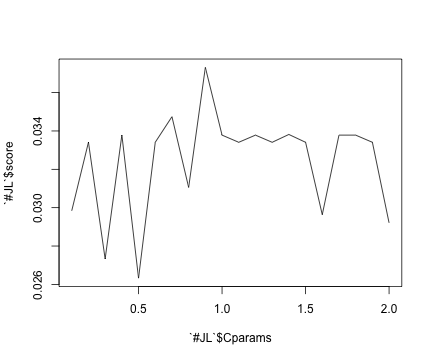

In [26]:
Cparams=convert.(Float64,res.cv_results_["param_C"])
score = res.cv_results_["std_test_score"]
R"plot($Cparams,$score,type='l')";

In [27]:
using PyCall
const ENS=pyimport("sklearn.ensemble")
const LM=pyimport("sklearn.linear_model")
const DA=pyimport("sklearn.discriminant_analysis")
const NN=pyimport("sklearn.neighbors")
const SVM=pyimport("sklearn.svm")
const TREE=pyimport("sklearn.tree")
const ANN=pyimport("sklearn.neural_network")
const GP=pyimport("sklearn.gaussian_process")
const KR=pyimport("sklearn.kernel_ridge")
const NB=pyimport("sklearn.naive_bayes")
const ISO=pyimport("sklearn.isotonic")

PyObject <module 'sklearn.isotonic' from '/Users/fearghalodonncha/.local/lib/python3.8/site-packages/sklearn/isotonic.py'>

In [28]:
learners = Dict(
  "AdaBoostClassifier" => ENS.AdaBoostClassifier,
  "BaggingClassifier" => ENS.BaggingClassifier,
  "ExtraTreesClassifier" => ENS.ExtraTreesClassifier,
  "VotingClassifier" => ENS.VotingClassifier,
  "GradientBoostingClassifier" => ENS.GradientBoostingClassifier,
  "RandomForestClassifier" => ENS.RandomForestClassifier,
  "LDA" => DA.LinearDiscriminantAnalysis,
  "QDA" => DA.QuadraticDiscriminantAnalysis,
  "LogisticRegression" => LM.LogisticRegression,
  "PassiveAggressiveClassifier" => LM.PassiveAggressiveClassifier,
  "RidgeClassifier" => LM.RidgeClassifier,
  "RidgeClassifierCV" => LM.RidgeClassifierCV,
  "SGDClassifier" => LM.SGDClassifier,
  "KNeighborsClassifier" => NN.KNeighborsClassifier,
  "RadiusNeighborsClassifier" => NN.RadiusNeighborsClassifier,
  "NearestCentroid" => NN.NearestCentroid,
  "SVC" => SVM.SVC,
  "LinearSVC" => SVM.LinearSVC,
  "NuSVC" => SVM.NuSVC,
  "MLPClassifier" => ANN.MLPClassifier,
  "GaussianProcessClassifier" => GP.GaussianProcessClassifier,
  "DecisionTreeClassifier" => TREE.DecisionTreeClassifier,
  "GaussianNB" => NB.GaussianNB,
  "MultinomialNB" => NB.MultinomialNB,
  "ComplementNB" => NB.ComplementNB,
  "BernoulliNB" => NB.BernoulliNB
);

In [29]:
function sktrain(learner,x,y)
    model = learner()
    xx = x |> Matrix
    yy = y |> Array
    model.fit(xx,yy)
    return model
end

sktrain (generic function with 1 method)

In [30]:
function skpredict(themodel,x)
    xx = x |> Matrix
    return themodel.predict(xx) |> collect
end

skpredict (generic function with 1 method)

In [32]:
R"""
library(caret)
cars = cars[complete.cases(cars),]
cars$Cylinders = as.factor(cars$Cylinders)

trainIndex <- createDataPartition(cars$Cylinders, p = .8,list=F)
train = cars[trainIndex,]
test = cars[-trainIndex,]
"""
@rget train test;

┌ Warning: RCall.jl: Loading required package: lattice
└ @ RCall /Users/fearghalodonncha/.julia/packages/RCall/iMDW2/src/io.jl:160


In [33]:
xtrain=train[:,[2,4,5,6,7]] |> Matrix
ytrain=train[:,:Cylinders] |> Array;
xtest=test[:,[2,4,5,6,7]] |> Matrix
ytest=test[:,:Cylinders] |> Array;

### Try ExtraTrees Classifier

In [34]:
modelLR = sktrain(learners["ExtraTreesClassifier"],xtrain,ytrain)
yhat = skpredict(modelLR,xtest);
acc=sum(yhat .== ytest) / length(yhat)

0.9733333333333334

### Try AdaBoost Classifier

In [35]:
modelLR = sktrain(learners["AdaBoostClassifier"],x,y)
res = skpredict(modelLR,x);
acc=sum(res .== y) / length(y)

0.7040816326530612

### Try RandomForest Classifier

In [36]:
modelLR = sktrain(learners["RandomForestClassifier"],x,y)
res = skpredict(modelLR,x);
acc=sum(res .== y) / length(y)

1.0

### Let's use R's Caret to predict Cars' Cylinders

In [37]:
using RCall
R"""
library(caret)
library(e1071)
library(randomForest)
library(xgboost)
"""

┌ Warning: RCall.jl: randomForest 4.6-14
│ Type rfNews() to see new features/changes/bug fixes.
│ 
│ Attaching package: ‘randomForest’
│ 
│ The following object is masked from ‘package:ggplot2’:
│ 
│     margin
│ 
└ @ RCall /Users/fearghalodonncha/.julia/packages/RCall/iMDW2/src/io.jl:160


RObject{StrSxp}
 [1] "xgboost"      "randomForest" "e1071"        "caret"        "lattice"     
 [6] "ggplot2"      "stats"        "graphics"     "grDevices"    "utils"       
[11] "datasets"     "methods"      "base"        


In [38]:
function crtrain(learner,x::DataFrame,y::Vector)
    xx = x |> DataFrame # DataFrame(x)
    yy = y |> Vector
    model = rcall(:train,xx,yy,method=learner)
    return model
end

crtrain (generic function with 1 method)

In [39]:
function crtpredict(model,x)
    xx = x |> DataFrame
    res = rcall(:predict,model,xx) #in robj
    return rcopy(res) |> collect  # return extracted robj
end

crtpredict (generic function with 1 method)

### Let's try RandForest in R

In [40]:
xtrain=train[:,[2,4,5,6,7]] |> DataFrame
ytrain=train[:,:Cylinders] |> Array;
xtest=test[:,[2,4,5,6,7]] |> DataFrame
ytest=test[:,:Cylinders] |> Array;

In [41]:
crtmodel = crtrain("rf",xtrain,ytrain)
ypred = crtpredict(crtmodel,xtest);
acc = sum(ypred .== ytest) / length(ytest)

┌ Warning: RCall.jl: Warning: model fit failed for Resample09: mtry=2 Error in randomForest.default(x, y, mtry = min(param$mtry, ncol(x)), ...) : 
│   Can't have empty classes in y.
│ 
│ Warning: model fit failed for Resample09: mtry=3 Error in randomForest.default(x, y, mtry = min(param$mtry, ncol(x)), ...) : 
│   Can't have empty classes in y.
│ 
│ Warning: model fit failed for Resample09: mtry=5 Error in randomForest.default(x, y, mtry = min(param$mtry, ncol(x)), ...) : 
│   Can't have empty classes in y.
│ 
│ Warning: model fit failed for Resample15: mtry=2 Error in randomForest.default(x, y, mtry = min(param$mtry, ncol(x)), ...) : 
│   Can't have empty classes in y.
│ 
│ Warning: model fit failed for Resample15: mtry=3 Error in randomForest.default(x, y, mtry = min(param$mtry, ncol(x)), ...) : 
│   Can't have empty classes in y.
│ 
│ Warning: model fit failed for Resample15: mtry=5 Error in randomForest.default(x, y, mtry = min(param$mtry, ncol(x)), ...) : 
│   Can't have empty cl

0.9866666666666667

In [66]:
crtmodel = crtrain("svmRadial",xtrain,ytrain)
ypred = crtpredict(crtmodel,xtest) 
sum(ypred .== ytest) / length(ytest)

0.9733333333333334

In [67]:
crtmodel = crtrain("treebag",xtrain,ytrain)
ypred = crtpredict(crtmodel,xtest) 
sum(ypred .== ytest) / length(ytest)

0.9866666666666667